## A notebook which samples the data to balance the multilabel classes a little more

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

clean = pd.read_parquet('../data/clean/clean.parquet')
clean_exploded = clean.explode('RA')

In [15]:
# calculate the inverse distribution of the RA categories so we can use this as a sampling distribution
distribution = clean_exploded['RA'].value_counts()
distribution_inverse = 1/distribution
distribution_inverse = distribution_inverse/distribution_inverse.sum()
clean_exploded['RA_dist'] = clean_exploded['RA'].map(distribution_inverse)

In [16]:
clean_exploded['RA_dist'] = clean_exploded['RA'].map(distribution_inverse)
clean_exploded['index'] = clean_exploded.index

In [17]:
# sum up distribution values from clean_exploded to clean
clean['RA_dist'] = clean_exploded.groupby('index')['RA_dist'].sum()

# normalise
clean['RA_dist'] = clean['RA_dist']/clean['RA_dist'].sum()

In [6]:
# normalise
# clean_exploded['RA_dist'] = clean_exploded['RA_dist']/clean_exploded['RA_dist'].sum()

In [22]:
# set a number of samples to draw, the bigger the number, the more grants for training but the less balanced the dataset
n = 15000
indices_balanced = np.random.choice(clean.index, n, p=clean['RA_dist'], replace=False)


number of grants in balanced dataset: 22445
number of grants in original: 34848


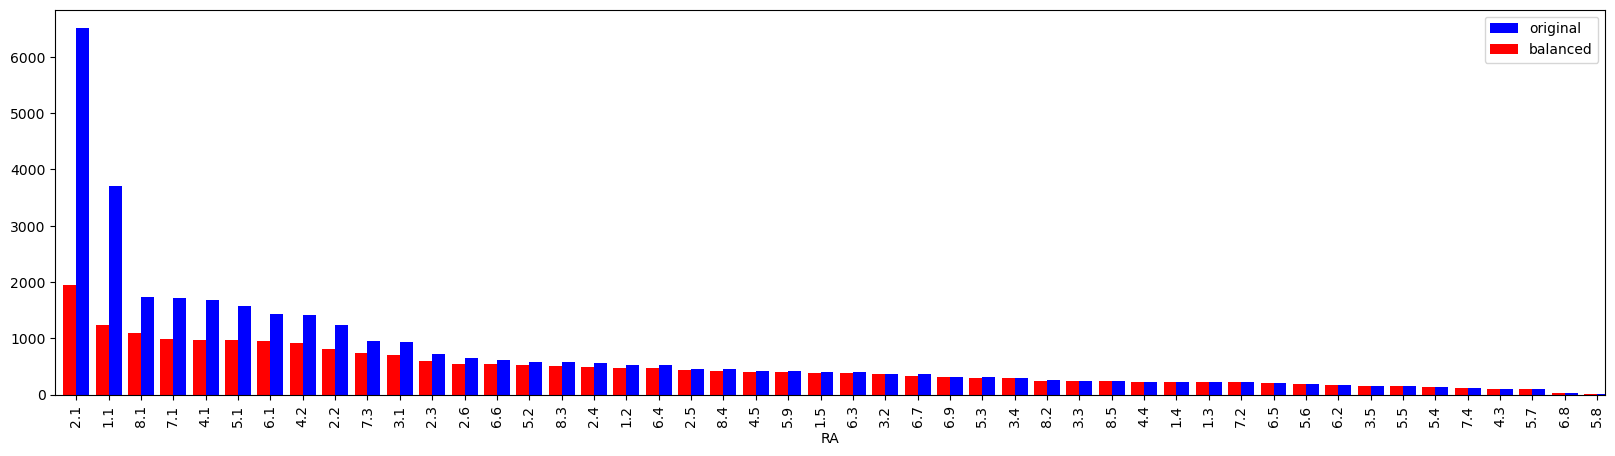

In [23]:
clean_balanced = clean.loc[indices_balanced]
clean_balanced_exploded = clean_balanced.explode('RA')
balanced_values_count = clean_balanced_exploded.value_counts('RA')
print(f"number of grants in balanced dataset: {balanced_values_count.sum()}")

values_count = clean_exploded.value_counts('RA')
print(f"number of grants in original: {values_count.sum()}")

# make an unstacked bar plot of both distributions
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
values_count.plot(kind='bar', ax=ax, position=0, color='b', width=0.4)
balanced_values_count.plot(kind='bar', ax=ax, position=1, color='r', width=0.4)

# show legend
plt.legend(['original', 'balanced'])
plt.show()

In [24]:
clean_balanced.to_parquet('../data/clean/clean_balanced.parquet')